In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autocast

from diffusers import StableDiffusionPipeline, DDPMScheduler
import matplotlib.pyplot as plt
def plt_show_iamge(image):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
model_id = "E:\\Myproject\\02Model\\HuggingFace-Download-Accelerator\\hf_hub\\models--runwayml--stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16, revision="fp16").to('cuda')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "E:\\Myproject\\02Model\\HuggingFace-Download-Accelerator\\hf_hub\\models--runwayml--stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## API学习

  0%|          | 0/50 [00:00<?, ?it/s]

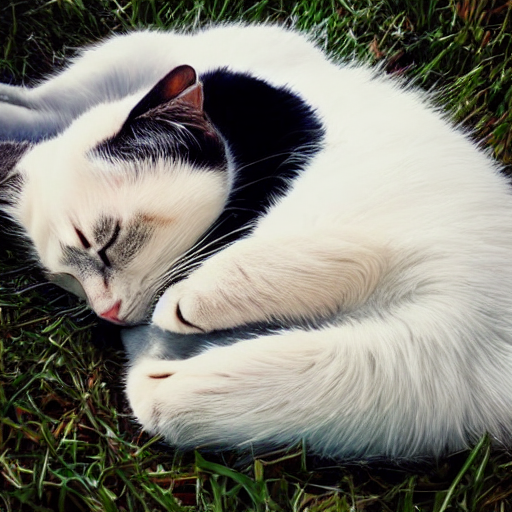

In [5]:
# generater
generater = torch.Generator("cuda").manual_seed(1024)
prompt = ' a sleeping cat enjoying the sun'
image = pipe(prompt,generater=generater).images[0]

image.save(f'lovely_cat.png')
image

  0%|          | 0/50 [00:00<?, ?it/s]

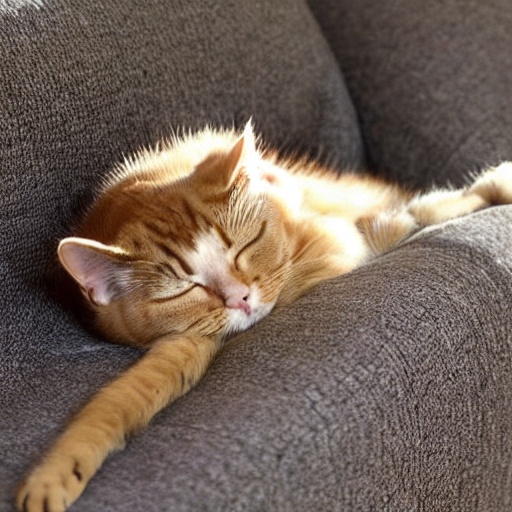

In [6]:
# adding negative prompt

generater = torch.Generator("cuda").manual_seed(1024)
prompt = ' a sleeping cat enjoying the sun'
image = pipe(prompt,generater=generater, negative_prompt='glass').images[0]
image.save(f'lovely_cat.png')
image

In [2]:
# visualize the diffusion process
import itertools
import math
import mediapy as media



In [10]:
!mkdir diffprocess

��Ŀ¼���ļ� diffprocess �Ѿ����ڡ�


In [7]:
@torch.no_grad()
def plot_show_callback(i, t, latents):
    latents_resrvoir.append(latents.detach().cpu())
    image = pipe.vae.decode(1 / 0.18215 * latents).sample
    image = ( image / 2 +0.5).clamp(0,1)
    image = image.cpu().permute(0, 2, 3, 1).float().numpy()[0]
    plt.imsave(f'diffprocess/{i:02d}.png', image)
    image_reservoir.append(image)

@torch.no_grad()
def save_latents(i, t, latents):
    latents_resrvoir.append(latents.detach().cpu())

image_reservoir = []
latents_resrvoir = []


In [8]:
prompt = " many students study in the library"
with torch.no_grad():
    image = pipe(prompt, callback=plot_show_callback, callback_steps = 2).images[0]

image.save(f'student.png')


e:\SoftWare\Program\Anaconda\envs\d2l\lib\site-packages\diffusers\pipelines\stable_diffusion\pipeline_stable_diffusion.py:911: FutureWarning: `callback` is deprecated and will be removed in version 1.0.0. Passing `callback` as an input argument to `__call__` is deprecated, consider using `callback_on_step_end`
  deprecate(
e:\SoftWare\Program\Anaconda\envs\d2l\lib\site-packages\diffusers\pipelines\stable_diffusion\pipeline_stable_diffusion.py:917: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider using `callback_on_step_end`
  deprecate(


  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
media.show_video(image_reservoir, fps=2)

In [10]:
# visualize latents
latents_resrvoir[0].shape

torch.Size([1, 4, 64, 64])

In [1]:
from diffusers import StableDiffusionPipeline
import torch
model = "E:\\Myproject\\02Model\\HuggingFace-Download-Accelerator\\hf_hub\\models--runwayml--stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16, revision="fp16")
device = torch.device("cuda:0")
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]